# 前書き

前回学んだ教師あり学習の基礎に引き続き、今回はより発展的な教師あり学習の話題について解説する。

# 1. 汎化性能とパフォーマンスチューニング

前回学んだように、教師あり学習の目的は未知のデータに対して正しい予測ができることである。

作成した学習モデルが未知データに対して正しく予測できる性
能のことを汎化性能と呼ぶ。

本章では、汎化性能および汎化性能を向上させるためのパフォーマンスチューニングについて説明する。

## 1-1. 過学習(オーバーフィッティング)

過学習(オーバーフィッティング)とは、訓練データに対する予測精度は高いが、

テストデータ(未知データ)に対する予測精度が低い状態のことを言う。

下記に過学習となっている学習モデルを示す。

使用しているデータ( breast_cancer.csv )は、

目的変数が乳がんの悪性、良性(target列)を意味し、

説明変数(他の列)が診察データとなっている。

breast_cancer.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/breast_cancer.csv)からダウンロードできる。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("breast_cancer.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

# 木の最大深さを10にして分類木を作成
model = DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print("train score: {}".format(score))
score = model.score(X_test, y_test)
print("test score: {}".format(score))

train score: 1.0
test score: 0.8811188811188811


決定木(分類木)のハイパーパラメータを max_depth = 10 に設定した学習を行っている。

前回はテストデータのスコアに着目していたが、今回は訓練データに対するスコアも表示している。

これ見ると、訓練データには100%の精度で予測ができ、テストデータには約88%の精度で予測できていることがわかる。

テストデータの88%が高いか低いかはタスクによるため一概に言えないが、

分類タスクにおいて訓練データの精度が100%やそれに近い状態は一般的に過学習を疑う。

過学習となっているかどうかの確認方法の一つとして、ハイパーパラメータを変えながら訓練データとテストデータの予測精度のバランスを見る方法がある。

下記に max_depth を1〜10に動かし、訓練データとテストデータのスコアを可視化するコードを示す。

max_depth = 1, train score: 0.9225352112676056, test score: 0.8811188811188811
max_depth = 2, train score: 0.9413145539906104, test score: 0.9370629370629371
max_depth = 3, train score: 0.9765258215962441, test score: 0.9370629370629371
max_depth = 4, train score: 0.9929577464788732, test score: 0.9020979020979021
max_depth = 5, train score: 0.9929577464788732, test score: 0.8951048951048951
max_depth = 6, train score: 0.9976525821596244, test score: 0.9230769230769231
max_depth = 7, train score: 0.9976525821596244, test score: 0.9230769230769231
max_depth = 8, train score: 1.0, test score: 0.8811188811188811
max_depth = 9, train score: 1.0, test score: 0.8811188811188811
max_depth = 10, train score: 1.0, test score: 0.8811188811188811


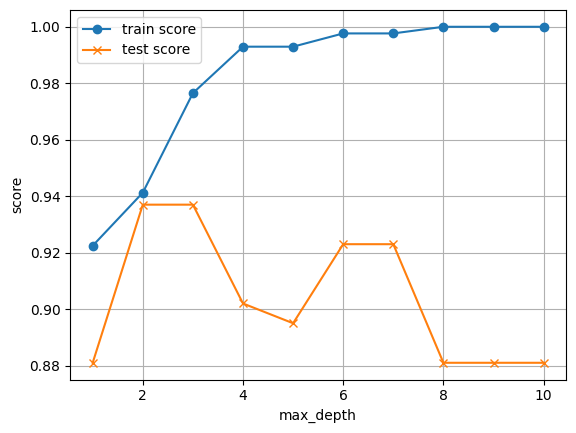

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("breast_cancer.csv")

X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
train_scores = []
test_scores = []

# 木の最大深さを1〜10にして分類木を作成
for md in range(1, 11):
  model = DecisionTreeClassifier(max_depth=md, random_state=0)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  print("max_depth = {}, train score: {}, test score: {}".format(md, train_score, test_score))
  train_scores.append(train_score)
  test_scores.append(test_score)

plt.plot(range(1, 11), train_scores, 'o-', label="train score")
plt.plot(range(1, 11), test_scores, 'x-', label="test score")

plt.xlabel('max_depth')
plt.ylabel('score')

plt.legend()
plt.grid()
plt.show()

このグラフを見ると、max_depthが3以上の学習モデルはテストデータの精度と訓練データの精度が大きく乖離しており、

テストデータの精度もピークを過ぎていることがわかる。

このことから、最初に実行した max_depth=10 の分類木はテストデータに比べ

過剰に訓練データに適合している状態(=過学習)と言える。

一般に、テストデータのスコアが良い事に加え、訓練データのスコアとテストデータのスコアの差が小さいと適度な学習が行われていると判断されることが多い。

なお、過学習とは逆に訓練データもテストデータも精度が低い状態を適合不足(学習不足)と呼ぶ。

上記で言うと、 max_depth=1 のような状態を指す。

## 1-2. ホールドアウト法と交差検証法

今までは未知のデータに対する予測精度を確かめるため、データを訓練データとテストデータに分け、

訓練データで学習した後テストデータで予測精度を評価する、という流れで学習モデルを構築した。

このモデルの構築と評価方法をホールドアウト法と言う。

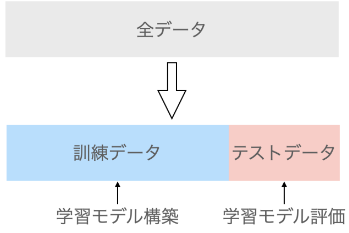

ホールドアウト法は十分なデータ量を確保し、かつ過学習などに気をつければ、シンプルな評価方法として十分機能する。

ただし、複雑なアルゴリズムのハイパーパラメータチューニングや、データが少ないまたは偏りがある場合に、過学習を見過ごしたり偶然テスト結果がよかったというケースが発生することがある。


そこでより実践的な評価方法として、交差検証法(cross-validation)がある。

代表的な交差検証法としてk-分割交差検証(k-fold cross-validation)があげられる。

k-分割交差検証はデータをk個のブロックに分け、そのうち1つを検証用データ、残り(k-1個)を学習用データとし、各ブロックが1回ずつ検証用データとなるように学習と検証を繰り返す。

検証のパターンがブロックの数と同じk個あるため、都合k回学習と検証を行う。

主にその平均値で学習アルゴリズムとハイパーパラメータの妥当性を評価する。

下記にイメージと実装例を示す。

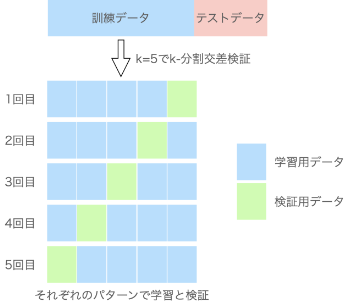

max_depth = 1
scores = [0.88372093 0.89411765 0.89411765 0.90588235 0.85882353]
mean = 0.8873324213406292, std = 0.015886965257808236, maen - std = 0.871445456082821
max_depth = 2
scores = [0.89534884 0.89411765 0.91764706 0.91764706 0.88235294]
mean = 0.9014227086183311, std = 0.014002649375958036, maen - std = 0.887420059242373
max_depth = 3
scores = [0.90697674 0.90588235 0.92941176 0.91764706 0.89411765]
mean = 0.9108071135430917, std = 0.011919573685795872, maen - std = 0.8988875398572959
max_depth = 4
scores = [0.90697674 0.89411765 0.91764706 0.90588235 0.88235294]
mean = 0.9013953488372092, std = 0.012091166114493465, maen - std = 0.8893041827227157
max_depth = 5
scores = [0.90697674 0.90588235 0.94117647 0.91764706 0.87058824]
mean = 0.908454172366621, std = 0.022794228225050756, maen - std = 0.8856599441415702
max_depth = 6
scores = [0.91860465 0.88235294 0.95294118 0.90588235 0.89411765]
mean = 0.9107797537619697, std = 0.024283774799259732, maen - std = 0.88649597896271
max

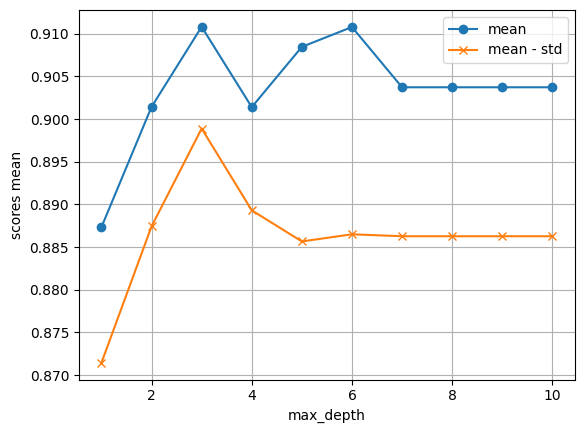

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

df = pd.read_csv("breast_cancer.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
means = []
lowers = []

for md in range(1, 11):
  print("max_depth = {}".format(md))
  model = DecisionTreeClassifier(max_depth=md, random_state=0)
  scores = cross_val_score(model, X_train, y_train, cv=5) # 5-分割交差検証でクロスバリデーション
  print("scores = {}".format(scores)) # k回学習と検証した結果のスコアを表示
  print("mean = {}, std = {}, maen - std = {}".format(scores.mean(), scores.std(), scores.mean() - scores.std()))
  means.append(scores.mean())
  lowers.append(scores.mean() - scores.std())

# 描画処理
plt.plot(range(1, 11), means, 'o-', label="mean")
plt.plot(range(1, 11), lowers, 'x-', label="mean - std")

plt.xlabel('max_depth')
plt.ylabel('scores mean')

plt.legend()
plt.grid()
plt.show()

k-分割交差検証を行うための関数として、 cross_val_score 関数がある。

引数に、 (学習器, 説明変数データ, 目的変数データ, cv=k) を指定する。

結果の評価には、交差検証の各回の学習と検証結果の平均値、または標準偏差が大きい場合には平均値から標準偏差を引いた値で評価する。

このk-分割交差検証によれば、 max_depth=3 が一番高い汎化性能を持っていると主張している。

先ほどの過学習の項目で触れた内容と合わせ、max_depthは2, 3あたりが良いと考察できる。

## 1-3. グリッドサーチ

汎化性能を高めるためのそもそもの手段として、ハイパーパラメータをチューニングすることがあげられる。

先ほどまで決定木におけるハイパーパラメータとし
て max_depth を使っていたが、

決定木は他にも min_samples_split (決定木のノードを分割するために必要な最小のサンプル数)や

min_samples_leaf (決定木の葉を構成するために必要な最小のサンプル数)などがある。

これらのパラメータを探索するコードを書くと、下記のようになる。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("breast_cancer.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

# 探索するハイパーパラメータ
max_depths = [2, 3, 4]
min_samples_splits = [2, 3, 4]
min_samples_leafs = [1, 2, 3]
max_score = 0
max_parameters = {}
for md in max_depths:
  for mss in min_samples_splits:
    for msl in min_samples_leafs:
      model = DecisionTreeClassifier(max_depth=md, min_samples_split=mss, min_samples_leaf=msl, random_state=0)
      model.fit(X_train, y_train)
      test_score = model.score(X_test, y_test)
      if max_score < test_score:
        max_score = test_score
        max_parameters['max_depth'] = md
        max_parameters['min_samples_split'] = mss
        max_parameters['min_samples_leaf'] = msl
# 最大のスコアとなったパラメータの表示
print("max_score = {}, max_parameters = {}".format(max_score, max_parameters))

# 最大のスコアとなったパラメータでスコアを確認
model = DecisionTreeClassifier(max_depth=max_parameters['max_depth'], min_samples_split=max_parameters['min_samples_split'], min_samples_leaf=max_parameters['min_samples_leaf'])
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("train score: {}, test score: {}".format(train_score, test_score))

max_score = 0.9370629370629371, max_parameters = {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 1}
train score: 0.9413145539906104, test score: 0.9370629370629371


このように愚直に実装する方法でも最適なハイパーパラメータが探索できるが、

探索するハイパーパラメータが4つ、5つと増え、さらに交差検証も行いながら...と考えると実装が大変となる。

そのような探索をグリッドサーチと呼ぶが、実はグリッドサーチを行うためのクラスがscikit-learnに用意されている。

下記にそのクラスを使ったコードの例を示す。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("breast_cancer.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

# グリッドサーチで探索するハイパーパラメータの設定
params = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [2, 3, 4],
  'min_samples_split': [2, 3, 4],
  'min_samples_leaf': [1, 2, 3]
}

# 分類木、上記のハイパーパラメータ、8-分割交差検証でグリッドサーチ
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=params, cv=8)
gs.fit(X_train, y_train) # 通常の学習器のようにメソッドが使える

print("best_score = {}".format(gs.best_score_)) # 最大スコア
print("best_params = {}".format(gs.best_params_)) # ベストなハイパーパラメータの組み合わせ
print("test_score = {}".format(gs.score(X_test, y_test))) # テストデータのスコア測定

best_score = 0.924746680642907
best_params = {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
test_score = 0.951048951048951


GridSearchCV クラスがグリッドサーチを行うためのクラスである。

 (estimator=学習器, param_grid=パラメータの辞書, cv=k) を指定して初期化する。

GridSearchCVのインスタンスは通常の学習器のようにメソッドが使え、

 .fit メソッドでestimatorで指定した学習器におけるparam_gridの全組み合わせを、

cvで指定したk-分割交差検証を行いながら学習を行う。

学習後、学習中の最大スコアを .best_score_ で、最適なハイパーパラメータの組み合わせを .best_params_ で取得できる。

最後に、通常の学習器同様 .score メソッドを使ってテストデータをスコアを確認できる。

# 2. 評価指標

今まで学習モデルの .score メソッドにおいて、分類タスクであれば正解率、回帰タスクであれば決定係数が表示されていた。

そのような指標のことを評価指標と呼ぶ。

本章では、学習モデルの評価指標について紹介する。

## 2-1. 分類の評価指標

### 正解率(accuracy)
正解率は全データから正しく判定できたものの割合である。

分類における .score メソッドの値で、predictの結果と accuracy_score 関数を利用して取得することもできる。

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd

df = pd.read_csv('breast_cancer.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1) , df['target'], test_size = 0.25, random_state = 0)

model = SVC()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9370629370629371
0.9370629370629371


### 適合率(precision)

適合率は正であると予測されたもののうち、実際に正であるものの割合である。

predictの結果と precision_score 関数を利用して取得できる。

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
import pandas as pd

df = pd.read_csv('breast_cancer.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1) , df['target'], test_size = 0.25, random_state = 0)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
print(precision)

0.9175257731958762


### 再現率(recall)

再現率は実際に正であるもののうち、正であると予測されたものの割合である。

predictの結果と recall_score 関数を利用して取得できる。

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import pandas as pd

df = pd.read_csv('breast_cancer.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1) , df['target'], test_size = 0.25, random_state = 0)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(recall)

0.9888888888888889


### 適合率(precision)と再現率(recall)の選択

適合率、再現率をどのようなケースで評価指標として選定すればよいか示す。

**適合率を評価指標に選択する場合**

適合率を評価指標に選択した方がよいケースは、誤っているものを正しいと判定することを避けたい場合である。

例えば迷惑メール判定モデル(迷惑メールを迷
惑メールと判定することが正しく、

通常メールを迷惑メールと判定することが誤りのケース)が当てはまる。

通常メールを迷惑メールと判定すると、通常メール
を読めなくなる可能性があり、

迷惑メールを見逃すことよりも避けたい。

そういった場合、適合率に注目する。

**再現率を評価指標に選択する場合**

再現率を評価指標に選択した方が良いケースは、正しいもの見逃すことを避けたい場合である。

例えば癌の判定モデルが当てはまる。

患者が本来は癌であるのに癌ではないと判定した場合に、患者の治療が遅れ命に関わる可能性がある。

そのため、癌ではない患者を誤って癌と判定してしまうことよりも癌を見逃してしまうことの方を避けたくなる。

そういった場合、再現率に注目する。



### F1スコア

適合率と再現率を利用した評価指標にF1スコアがある。F1スコアは下記の式で得られる。

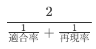

predictの結果と f1_score 関数を利用して取得できる。

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd

df = pd.read_csv('breast_cancer.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1) , df['target'], test_size = 0.25, random_state = 0)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.9518716577540107


### AUC、ROC曲線

AUC(Area Under the Curve)はROC(Receiver Operating Characteristic)曲線の積分で計算される値のことである。

値が1に近いほどモデルの予測能力が高く、0.5に近いほどモデルの予測能力が低くなる。

最も悪い0.5の場合はランダムに判別することと同じ意味となる。

AUCはpredictの結果と roc_auc_score 関数を利用して取得できる。

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('breast_cancer.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1) , df['target'], test_size = 0.25, random_state = 0)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9189727463312369


AUCの値の高さは、分類タスクの判別能力が高いことを意味する。

## 2-2. 不均衡データとAUCの活用

不均衡データとは、分類タスクにおいて目的変数の分布に極端な偏りがあるデータのことを指す。

例えば、不良品を判定するモデルを作成したい場合を考えると、仮に不良品率が0.01%であれば、

全て良品と答えれば、正解率(Accuracy)が99.99%ということになる。

その際、実際に不良品であるデータを一つも当てれなかったと言うことになるため、

再現率(Recall)は0となる。

そういった不均衡データの場合でも耐えられる指標がAUCとなっており、実際に使われることが多い。

実際に breast_cancer_imbalance.csv を用いて説明する。このデータセットは、

breast_cancer.csv の目的変数が悪性(0)の行を意図的に削ったデータとなっている。

全400件のうち、良性が354件となっており、全て良性と予測しても正解率が 354/400 = 0.885 となる。

そのため、正解率だけを見るのは不適切となる。

breast_cancer_imbalance.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/breast_cancer_imbalance.csv)からダウンロードできる。

上記を考慮した具体的な実装について説明する。

GridSearchCVの引数に

 scoring='評価指標を表す文字列' を指定すると、

 その評価指標で交差検証を行う。

 これを利用し、その評価指標における最適なハイパーパラメータの探索が行える。

 下記にコードを示す。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

df = pd.read_csv("breast_cancer_imbalance.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# グリッドサーチで最適なハイパーパラメータを探索
params = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [2, 3, 4],
  'min_samples_split': [2, 3, 4],
  'min_samples_leaf': [1, 2, 3]
}

k = 6

print("[Accuracy]")

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=params, cv=k)
gs.fit(X_train, y_train)
y_predict = gs.predict(X_test)
print("best_score = {}".format(gs.best_score_))
print("best_params = {}".format(gs.best_params_))
print("train_score = {}".format(gs.score(X_train, y_train)))
print("test_score = {}".format(gs.score(X_test, y_test)))
print("AUC score: {}".format(roc_auc_score(y_predict, y_test)))

print("[AUC]")
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=params, scoring='roc_auc', cv=k)
gs.fit(X_train, y_train)
y_predict = gs.predict(X_test)
print("best_score = {}".format(gs.best_score_))
print("best_params = {}".format(gs.best_params_))
print("train_score = {}".format(gs.score(X_train, y_train)))
print("test_score = {}".format(gs.score(X_test, y_test)))
print("AUC score: {}".format(roc_auc_score(y_predict, y_test)))

[Accuracy]
best_score = 0.9633333333333334
best_params = {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
train_score = 0.9766666666666667
test_score = 0.96
AUC score: 0.8641304347826088
[AUC]
best_score = 0.9151701818852982
best_params = {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
train_score = 0.9930192848533548
test_score = 0.984375
AUC score: 0.8833943833943834


通常のGridSearchCVと、 scoring='roc_auc' を指定したGridSearchCVで分類木を作成し、

グリッドサーチを行っている。best_scoreはGridSearchCVで指定した評価指標、train/test scoreは

元々学習アルゴリズムが持っている正解率である。

この結果を見ると、AUCを評価指標としたことにより、AUCがベストなパラメータを探索できただけでなく、

不均衡データの正解率にもプラスの影響を与えていることがわかる。

## 2-3. 回帰の評価指標

回帰モデルの評価指標を紹介する。



### 平均二乗誤差

サンプルの予測値と正解の差の二乗の平均値である。

シンプルで分かりやすいため、さまざまなアルゴリズムの性能指標に使用される。

GridSearchCVで利用する場合scoringに neg_mean_squared_error を指定する。

### 平均絶対誤差

サンプルの予測値と正解の差の絶対値の平均値である。

平均二乗誤差を比較すると2乗していないため外れ値に強い傾向にある。

GridSearchCVで利用する場合scoringに neg_mean_absolute_error を指定する。

### 中央絶対誤差
サンプルの予測値と正解の差の絶対値の中央値である。

平均絶対誤差よりもさらに外れ値に強い傾向にある。

GridSearchCVで利用する場合scoringに neg_median_absolute_error を指定する。


### 決定係数
検証データの平均値で予測をした場合の残差平方和とモデルの残差平方和の比率で表す。

説明変数が目的変数をどれくらい説明できているかを示す指標である。

通常0から1の値を取る。1に近いほど良い値である。負になる可能性もある。

GridSearchCVで利用する場合scoringに r2 を指定する。

# 3. アンサンブル学習

教師あり学習の発展的なアルゴリズムとしてアンサンブル学習がある。

アンサンブル学習とは、複数の学習器を組み合わせて1つの学習モデルを構築する手法である。

単一のアルゴリズムでは到達できない高い精度を出せる可能性があり、精度を追求するケースにおいて

良く使われる実践的な手法となる。

具体的な手法として、バギングとブースティングに分けられる。

## 3-1. バギング

バギングはbootstrap aggregatingの略。

学習データの一部を復元抽出(重複を許して抽出)して学習モデルを複数構築し、

それらのモデルの多数決(分類タスク)や平均値(回帰タスク)で予測を行う。

一般に、過学習傾向にある時バギングによって汎化性能を向上させる可能性がある。

下記に、 breast_cancer.csv の分類タスクをバギングを用いて記述した例を示す。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

df = pd.read_csv("breast_cancer.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

# 通常の決定木(分類木)でモデル構築
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("DecisionTreeClassifier: train score = {}, test score = {}".format(train_score, test_score))

# 決定木10個を用いたバギングでモデル構築
model = BaggingClassifier(DecisionTreeClassifier(random_state=0), n_estimators=10, random_state=0)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("BaggingClassifier: train score = {}, test score = {}".format(train_score, test_score))

DecisionTreeClassifier: train score = 1.0, test score = 0.8811188811188811
BaggingClassifier: train score = 0.9929577464788732, test score = 0.972027972027972


分類タスクにおけるバギングは、 BaggingClassifier クラス(回帰の場合は BaggingRegressor )を利用する。

学習器、学習器の個数(n_estimators)などを指定する。使い方は通常の学習器と同様で、

結果を見ると高い精度が出ていることがわかる。

### ランダムフォレスト

ランダムフォレストはバギングにおける代表的なアルゴリズムで、決定木をベースとしたバギングとなっている。

分類タスクは RandomForestClassifier クラス、
回帰タスクは RandomForestRegressor クラスを利用する。

下記に breast_cancer.csv の分類タスクをランダムフォレストで学習する例を示す。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("breast_cancer.csv")

X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

# ランダムフォレストでモデル構築
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("RandomForestClassifier: train score = {}, test score = {}".format(train_score, test_score))

# グリッドサーチで最適なハイパーパラメータを探索
params = {
  'n_estimators': [25, 50, 75, 100],
  'max_depth': [2, 3, 4, 5]
}
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=params, cv=8)
gs.fit(X_train, y_train)

print("best_score = {}".format(gs.best_score_))
print("best_params = {}".format(gs.best_params_))
print("train_score = {}".format(gs.score(X_train, y_train)))
print("test_score = {}".format(gs.score(X_test, y_test)))

RandomForestClassifier: train score = 1.0, test score = 0.972027972027972
best_score = 0.9530048916841369
best_params = {'max_depth': 4, 'n_estimators': 75}
train_score = 0.9929577464788732
test_score = 0.972027972027972


ランダムフォレストとグリッドサーチの組み合わせは実用的な学習方法の一つとなる。

その他ハイパーパラメータの詳細は公式サイトを参考。

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## 3-2. ブースティング

ブースティングはまず元の学習データに対して学習を行い学習モデルを生成、

次に正解から外したデータを重視するように学習を行い学習モデルを生成、

さらにその次は一つ前に外したデータを重視するように学習を行い学習モデルを生成...という具合に

学習モデルの生成を次々と行い、それらの学習モデルを総合して予測を行う。

一般に、適合不足傾向にある時ブースティングによって汎化性能を向上させる可能性がある。

下記に、 boston.csv の回帰タスクをブースティングを用いて記述した例を示す。

boston.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/boston.csv)からダウンロードできる。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

df = pd.read_csv("boston.csv")
X = df.drop("house prices", axis=1)
y = df["house prices"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 通常の決定木(回帰木)でモデル構築
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("DecisionTreeRegressor: train score = {}, test score = {}".format(train_score, test_score))

# 回帰木10個を用いたブースティングでモデル構築
model = AdaBoostRegressor(DecisionTreeRegressor(random_state=0), n_estimators=10, random_state=0)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("AdaBoostRegressor: train score = {}, test score = {}".format(train_score, test_score))

DecisionTreeRegressor: train score = 1.0, test score = 0.6473101995864959
AdaBoostRegressor: train score = 0.9977282442769123, test score = 0.750627783484337


回帰タスクにおけるブースティングは、 AdaBoostRegressor クラス(分類の場合は AdaBoostClassifier )を利用する。

学習器、学習器の個数(n_estimators)などを指定する。

使い方は通常の学習器と同様で、結果を見ると高い精度が出ていることがわかる(前回の講義内では0.68前後が最高精度)。

ただし、訓練データのスコアを見るとわかる通り、この結果は過学習傾向にある点に注意が必要。

### 勾配ブースティング

勾配ブースティングはブースティングにおける代表的なアルゴリズムで、

決定木をベースとしたブースティングとなっている。

分類タスクはGradientBoostingClassifierクラス、

回帰タスクはGradientBoostingRegressorクラスを利用する。

下記にboston.csvの回帰タスクを勾配ブースティングで学
習する例を示す。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv("boston.csv")
X = df.drop("house prices", axis=1)
y = df["house prices"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 勾配ブースティングでモデル構築
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("GradientBoostingRegressor: train score = {}, test score = {}".format(train_score, test_score))

# グリッドサーチで最適なパラメータを探索
params = {
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 4, 5]
}
gs = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0), param_grid=params, cv=5)
gs.fit(X_train, y_train)

print("best_score = {}".format(gs.best_score_))
print("best_params = {}".format(gs.best_params_))
print("train_score = {}".format(gs.score(X_train, y_train)))
print("test_score = {}".format(gs.score(X_test, y_test)))

GradientBoostingRegressor: train score = 0.9802418805686561, test score = 0.8272523717843239
best_score = 0.8670728750811711
best_params = {'max_depth': 3, 'n_estimators': 200}
train_score = 0.9924061017068653
test_score = 0.8363791011862731


ランダムフォレスト同様、勾配ブースティングとグリッドサーチの組み合わせは実用的な学習方法の一つとなる。

その他ハイパーパラメータの詳細は公式サイトを参考。

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

## 3-3. バギング、ブースティングにおけるグリッドサーチ

ランダムフォレストや勾配ブースティングは単一のアルゴリズムとして振舞うため、

グリッドサーチがそのまま使えるが、BaggingClassifierや
AdaBoostRegressorのように学習器を設定する場合に、

その学習器のハイパーパラメータをチューニングするためにグリッドサーチを使いたいケースが考えられる。

そういった場合、下記のように記述する。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

df = pd.read_csv("boston.csv")
X = df.drop("house prices", axis=1)
y = df["house prices"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# base_estimator__をつけるとアンサンブル学習の中身の学習器にパラメータが渡される
params = {
  'base_estimator__max_depth' : [2, 3],
  'n_estimators' : [50, 100]
}
gs = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(random_state=0)), param_grid=params, cv=10)
gs.fit(X_train, y_train)

print("best_score = {}".format(gs.best_score_))
print("best_params = {}".format(gs.best_params_))
print("train_score = {}".format(gs.score(X_train, y_train)))
print("test_score = {}".format(gs.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_est

best_score = 0.8216954439066493
best_params = {'base_estimator__max_depth': 3, 'n_estimators': 100}
train_score = 0.9277495856301418
test_score = 0.6993625854869358


グリッドサーチのパラメータ設定の際、 base_estimator__ をつけるとBaggingClassifierや

AdaBoostRegressorに設定した学習器の方でそのパラメータが探索される。

# 4. 演習および課題

## 4-1. 演習

### 演習1.

breast_cancer_imbalance.csv の分類タスクについて、下記設定で学習モデルを構築せよ。

- train_test_splitの設定:test_size=0.25, random_state=0

- 学習アルゴリズム: GradientBoostingClassifier
- グリッドサーチで探索するパラメータ: n_estimators を[50, 75, 100]、 max_depth を[2, 3, 4]
- グリッドサーチのcv:8
- グリッドサーチの評価指標:AUC
- 出力:グリッドサーチの最高スコア、最適パラメータ、訓練データスコア、テストデータスコア、テストデータのAUC

### 演習2.

boston.csv の回帰タスクについて、下記設定で学習モデルを構築せよ。

- train_test_splitの設定:test_size=0.25, random_state=0
- 学習アルゴリズム: RandomForestRegressor
- グリッドサーチで探索するパラメータ: n_estimators を[50, 75, 100]、 max_depth を[2, 3, 4]
- グリッドサーチのcv:10
- グリッドサーチの評価指標:決定係数( )
- 出力:グリッドサーチの最高スコア、最適パラメータ、訓練データスコア、テストデータスコア

## 4-2. 課題

### 課題1.

演習のタスクにおいて、train_test_splitの設定、グリッドサーチのcv、評価指標はそのままとし、

アンサンブル学習の選択やハイパーパラメータのチューニングを行いモデルの精度を可能な限り高めよ。

学習済みモデルをpickleを使い出力し、そのモデルとモデルを生成したコードを提出せよ。